<h1>Analyzing Historical Stock/Revenue Data and Building a Dashboard</h1>

In [1]:
#installing required libraries
!pip install pandas
!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4
!pip install plotly==5.3.1
!pip install yfinance==0.2.4
!pip install --upgrade nbformat


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
zsh:1: command not found: mamba
zsh:1: command not found: mamba
  Using cached lxml-4.6.4.tar.gz (3.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [108 lines of output]
      Building lxml version 4.6.4.
      /private/var/folders/yf/5pnt1t496dlb8sypjy1jqxv80000gn/T/pip-install-amvz2kq1/lxml_d0f2a8503a7540d6aae3cd0e9f8db261/setup.py:67: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        import pkg_resources
      Building without Cython.
      Building against libxml2 2.10.3 and libxslt 1.1.37
      Building against libxml2/libxslt in one of the following directories:
     

In [11]:
#importing required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

### Question 1 - Extracting Tesla Stock Data Using yfinance

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [12]:
# get data from yfinance
tsla = yf.Ticker("TSLA")

# get the history for the ticker
tsla_data = tsla.history(period="max")

# reindex the data
tsla_data.reset_index(inplace=True)
tsla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping

Display the last five rows of the tesla_revenue dataframe using the function tail. Upload a screenshot of the results.

In [13]:
# get webpage for stock info
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data  = requests.get(url).text
tsla_soup = BeautifulSoup(data, 'html5lib')

#find data location
tsla_find = tsla_soup.find("tbody").find("tr").find_all("td")

tsla_revenue_list = []
#create dataframe for final data
tsla_revenue = pd.DataFrame(columns=[
    "Date",
    "Revenue"
    ])

# for loop to assign data to proper columns
for row in tsla_soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    tsla_revenue_list = [
        date,
        revenue
    ]
    #add list info to next column of data frame
    tsla_revenue.loc[len(tsla_revenue)] = tsla_revenue_list

tsla_revenue["Revenue"] = tsla_revenue['Revenue'].str.replace('$',"")
tsla_revenue["Revenue"] = tsla_revenue['Revenue'].str.replace(',',"")
tsla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


### Question 3 - Extracting GameStop Stock Data Using yfinance

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [5]:
# get data from yfinance
gme = yf.Ticker("GME")

#get the history for the ticker
gme_data = gme.history(period="max")

#re-index the data
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [15]:
# get webpage for stock info
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

gme_soup_data = requests.get(url).text
gme_soup = BeautifulSoup(gme_soup_data, 'html5lib')
#find data location
gme_find = gme_soup.find("tbody").find("tr").find_all("td")

gme_revenue_list = []
#create dataframe for final data
gme_revenue = pd.DataFrame(columns=[
    "Date",
    "Revenue"
    ])

# for loop to assign data to proper columns
for row in gme_soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    
    gme_revenue_list = [
        date,
        revenue
    ]
    #add list info to next column of data frame
    gme_revenue.loc[len(gme_revenue)] = gme_revenue_list

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$',"")
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(",","")
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


In [20]:
#creating a make_graph
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2020--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2020-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Billions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
  

### Question 5 - Tesla Stock and Revenue Dashboard

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

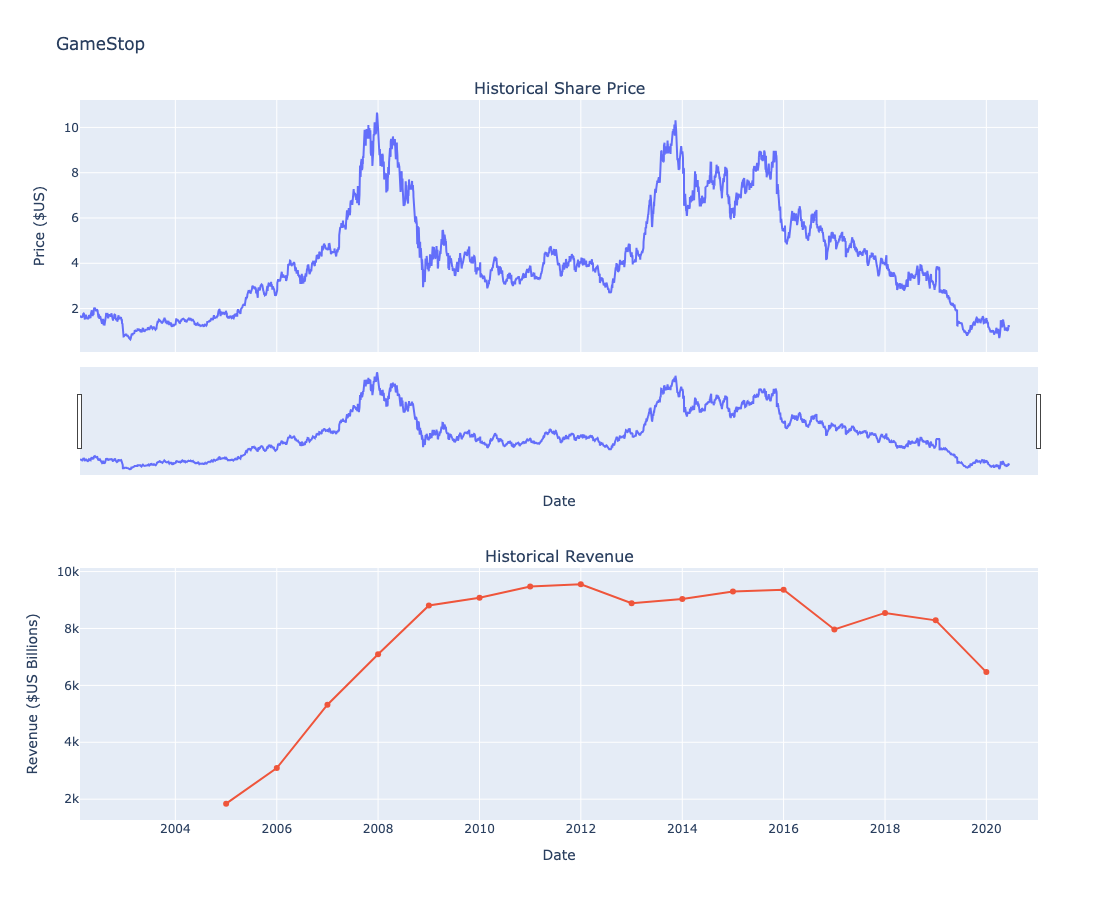

In [19]:
make_graph(gme_data, gme_revenue, 'GameStop')

### Question 6 - GameStop Stock and Revenue Dashboard

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

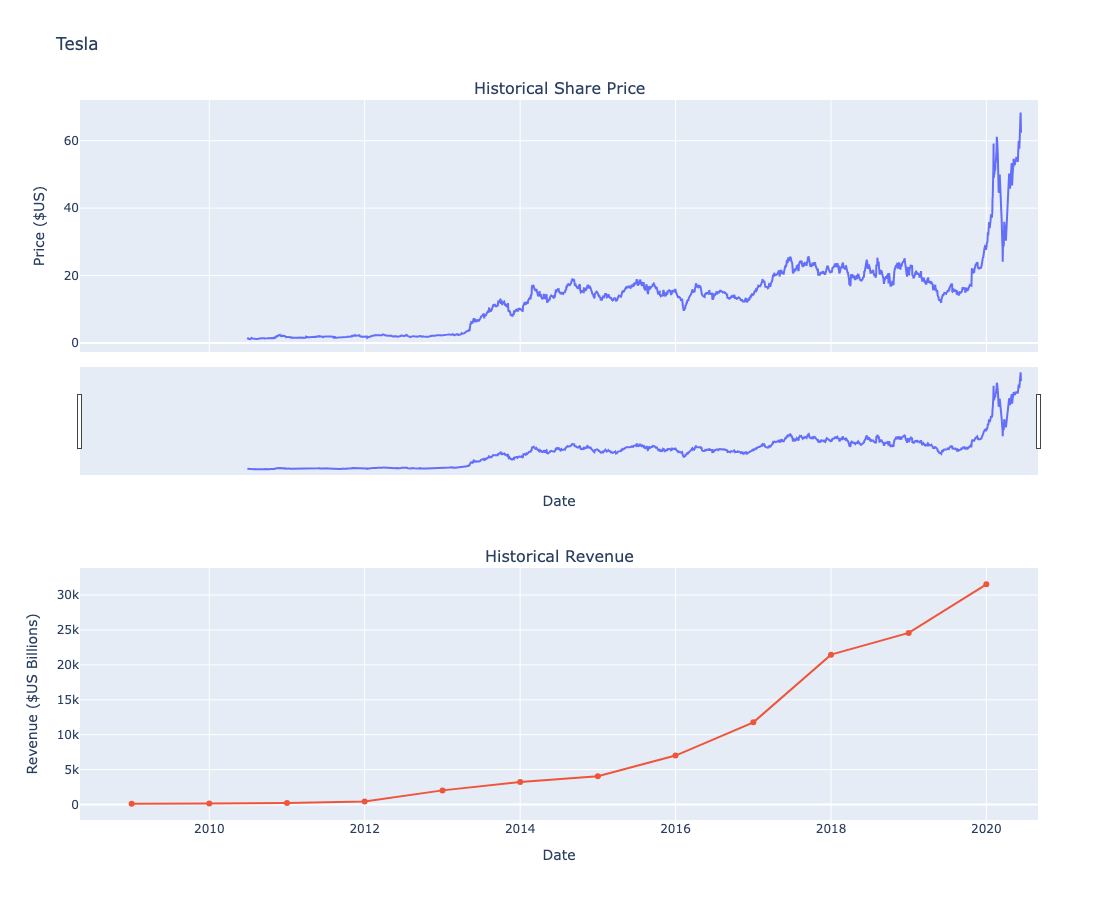

In [18]:
make_graph(tsla_data, tsla_revenue, 'Tesla')